In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('/kaggle/input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv', encoding='ISO-8859-1')

In [4]:
data.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [ ]:
# Data cleaning
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# EDA
# Explore the dataset, create plots, and analyze the data
# For example:
sns.countplot(x=data['0'], data=data)
plt.show()


### Looks like there would be less class imbalance

In [18]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data) - len(data.dropna()),
                 "Number of duplicate observations": data.duplicated().sum()}).to_string())

Number of observations with missing values    0
Number of duplicate observations              0


In [ ]:
data.reset_index(drop = True, inplace = True) # Resetting index

Changing the names of the column for easrier understanding

In [5]:
data.head()
data['Type'] = data['0']
data['description'] = data['a']
data = data.drop(columns=['0','a'])
data.head()

,Unnamed: 0,Type,description
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


### Label encoding

In [6]:
# Manual encoding of labels
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the cancer type column


from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the cancer type column
data['Type_Encoded'] = label_encoder.fit_transform(data['Type'])

# Get the mapping of original values to encoded values
original_values = data['Type'].unique()
encoded_values = label_encoder.transform(original_values)

# Create a DataFrame to display the mapping
encoding_mapping = pd.DataFrame({'Original Value': original_values, 'Encoded Value': encoded_values})

print(encoding_mapping)


   Original Value  Encoded Value
0  Thyroid_Cancer              2
1    Colon_Cancer              0
2     Lung_Cancer              1


In [7]:
data.head()

,Unnamed: 0,Type,description,Type_Encoded
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,2
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",2
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,2
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,2
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,2


## Data analysis

In [19]:
import pandas as pd
import plotly.express as px

# Sample DataFrame with descriptions (replace this with your actual dataset)
df = pd.DataFrame(data)

# Tokenize the descriptions and count the number of words
df['num_words'] = df['description'].apply(lambda x: len(x.split()))

# Create an interactive histogram using Plotly
fig = px.histogram(df, x='num_words', color='Type', marginal="rug")

fig.update_layout(
    title='Distribution of Number of Words in Descriptions by Cancer Type',
    xaxis_title='Number of Words',
    yaxis_title='Frequency',
    showlegend=True
)
fig.show()

The Plotly graph shows how the number of words in descriptions varies for different types of cancer. Each colored bar represents a cancer type, and its height indicates how many descriptions have a certain word count. This helps compare the length of descriptions across cancer types.

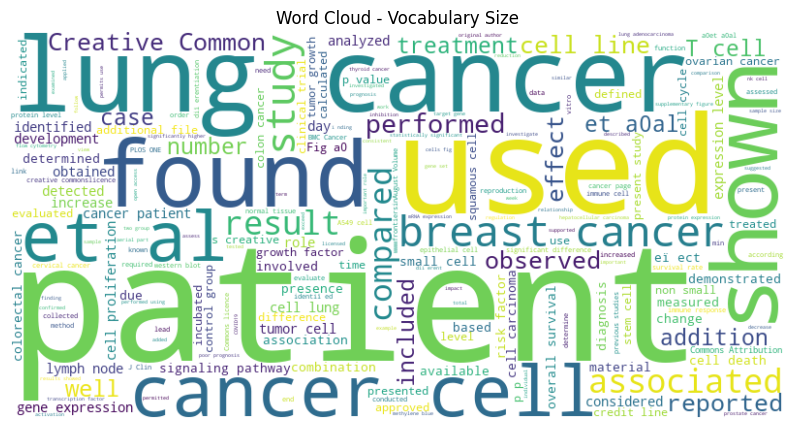

In [20]:
from wordcloud import WordCloud

# Combine all text from the 'description' column into a single string
corpus = ' '.join(data['description'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Vocabulary Size')
plt.show()

"Word clouds assist in the detection and removal of stopwords, making content analysis and summarization easier. They also aid in topic identification."

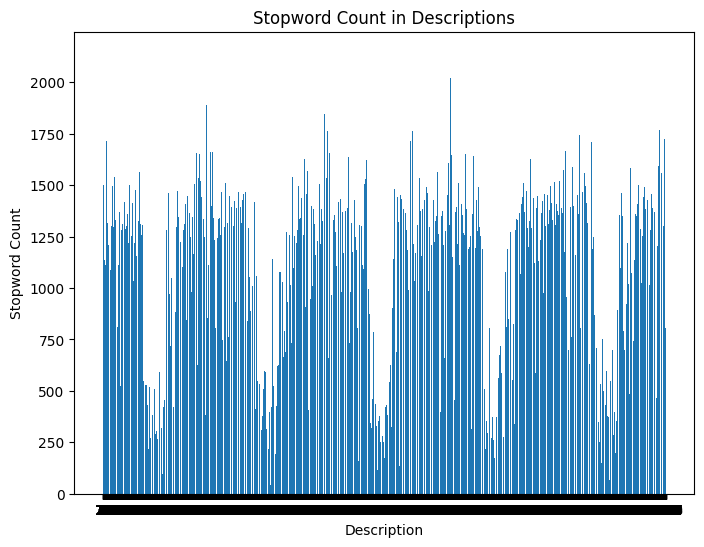

In [21]:
import pandas as pd
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data)

# Tokenize and count stopwords
stop_words = set(stopwords.words('english'))
df['stopword_count'] = df['description'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

# Create a bar chart to visualize stopword counts
plt.figure(figsize=(8, 6))
plt.bar(df.index, df['stopword_count'])
plt.xticks(df.index, df.index, rotation=0)
plt.xlabel('Description')
plt.ylabel('Stopword Count')
plt.title('Stopword Count in Descriptions')
plt.show()

 In tasks like sentiment analysis or text classification, stopwords may not be removed because they can provide valuable context

# Data Pre-Processing

In [ ]:
pip install nltk==3.5

In [8]:
import nltk
print(nltk.__version__)

3.5


## Applying different text normalization techniques
* Lowercasing :  Lowercasing converts all text to lowercase, aiding in standardization and reducing case-related variations in text data.

* Tokenization : Tokenization breaks text into smaller units (tokens), such as words or subwords, making it easier to process and analyze text.

* Stemming : Stemming reduces words to their root form, helping to group similar words together and reduce dimensionality.

* Lemmatization :Lemmatization also reduces words but to their base or dictionary form, preserving meaningful word forms.

* Removing special:Characters: Removing special characters like punctuation and symbols cleans text for analysis while preserving meaningful words.

Reconstruct

In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

df = pd.DataFrame(data)

# Define a function for text normalization
def normalize_text(text):
    # Lowercasing
    text = text.lower()
    
    # Tokenization (splitting into words)
    words = nltk.word_tokenize(text)
    
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Removing special characters, digits, and extra whitespace
    words = [re.sub(r'[^a-zA-Z]', ' ', word) for word in words]
    
    # Reconstruct the normalized text
    normalized_text = ' '.join(words)
    
    return normalized_text

# Apply text normalization and create a new column with the transformed text
df['normalized_text'] = df['description'].apply(normalize_text)

data = df

In [ ]:
# Display both the original and normalized text
(df[['description', 'normalized_text']])

## The need for Non-DL Techniques

* Interpretability: Non-deep learning methods provide models with clear, understandable rules, crucial for applications     like medical diagnoses where transparency matters.

* Simplicity: They are less complex, easier to train, and resource-efficient, making them suitable for low-power devices     and rapid prototyping.

* Small Data: Non-deep learning models perform well with limited data, making them practical when obtaining extensive        datasets is challenging.

* Feature Engineering: These methods allow experts to manually design features, tailoring models to domain-specific         knowledge, improving accuracy.
 
* Competitive Performance: Non-deep learning models often outshine deep learning in simpler problems or when data lacks     complex patterns, without the computational overhead.

## Non DL Techniques

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Sample DataFrame with normalized text and labels (replace with your actual data)
data = df

df = pd.DataFrame(data)

# Split the data into training and testing sets
X = df['normalized_text']
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Logistic Regression Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Display accuracy and classification reports for each classifier
print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

print("Logistic Regression Classifier Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

print("SVM Classifier Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

Naive Bayes Classifier Accuracy: 0.916116248348745
Naive Bayes Classification Report:
                 precision    recall  f1-score   support

  Colon_Cancer       0.90      0.86      0.88       517
   Lung_Cancer       1.00      0.98      0.99       407
Thyroid_Cancer       0.88      0.92      0.90       590

      accuracy                           0.92      1514
     macro avg       0.92      0.92      0.92      1514
  weighted avg       0.92      0.92      0.92      1514

Logistic Regression Classifier Accuracy: 0.939894319682959
Logistic Regression Classification Report:
                 precision    recall  f1-score   support

  Colon_Cancer       0.91      0.92      0.91       517
   Lung_Cancer       1.00      1.00      1.00       407
Thyroid_Cancer       0.93      0.92      0.92       590

      accuracy                           0.94      1514
     macro avg       0.94      0.95      0.94      1514
  weighted avg       0.94      0.94      0.94      1514

SVM Classifier Accur

In [10]:
data.head()

,Unnamed: 0,Type,description,Type_Encoded,normalized_text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,2,thyroid surgeri child singl institut osama ibr...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",2,adopt strategi use prior year base four...
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,2,coronari arterybypass graft thrombosi brin ...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,2,solitari plasmacytoma sp skull uncommon clinic...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,2,studi aim investig serum matrix metalloprotein...


 ## A fundamental deep learning model applied.

In [23]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with normalized text and labels (replace with your actual data)

df = pd.DataFrame(data)

# Split the data into training and testing sets
X = df['normalized_text']
y = df['Type_Encoded']

# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Number of folds
k_folds = 3
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define the neural network model
class TextClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Perform k-fold cross-validation
accuracies = []

for train_idx, test_idx in skf.split(X_tfidf, y_encoded):
    X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Convert NumPy arrays to PyTorch tensors and ensure the data types are the same
    X_train = torch.tensor(X_train.toarray(), dtype=torch.float32)
    X_test = torch.tensor(X_test.toarray(), dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.int64)
    y_test = torch.tensor(y_test, dtype=torch.int64)

    # Instantiate and train the model
    INPUT_DIM = X_train.shape[1]
    HIDDEN_DIM = 256
    OUTPUT_DIM = len(label_encoder.classes_)

    model = TextClassifier(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM)
    optimizer = optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()

    N_EPOCHS = 10
    for epoch in range(N_EPOCHS):
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = criterion(predictions, y_train)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        predicted_labels = torch.argmax(predictions, dim=1)
        accuracy = accuracy_score(y_test, predicted_labels)
        accuracies.append(accuracy)

    # Release GPU memory
    del X_train, X_test, y_train, y_test
    torch.cuda.empty_cache()

# Calculate the average accuracy over all folds
avg_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {avg_accuracy:.2f}')

Average Accuracy: 0.93


## Stratified K-fold cross-validation: 

Stratified K-fold cross-validation helps ensure the model's performance consistency across different data subsets, highlighting its stability and robustness when accuracy remains consistent across folds. This indicates the model's reliability in making accurate predictions on diverse data.

Average Accuracy for Each Epoch: [0.45429326 0.7317041  0.84900925 0.89815059 0.91730515 0.92351387
 0.92589168 0.92655218 0.92734478 0.92708058]


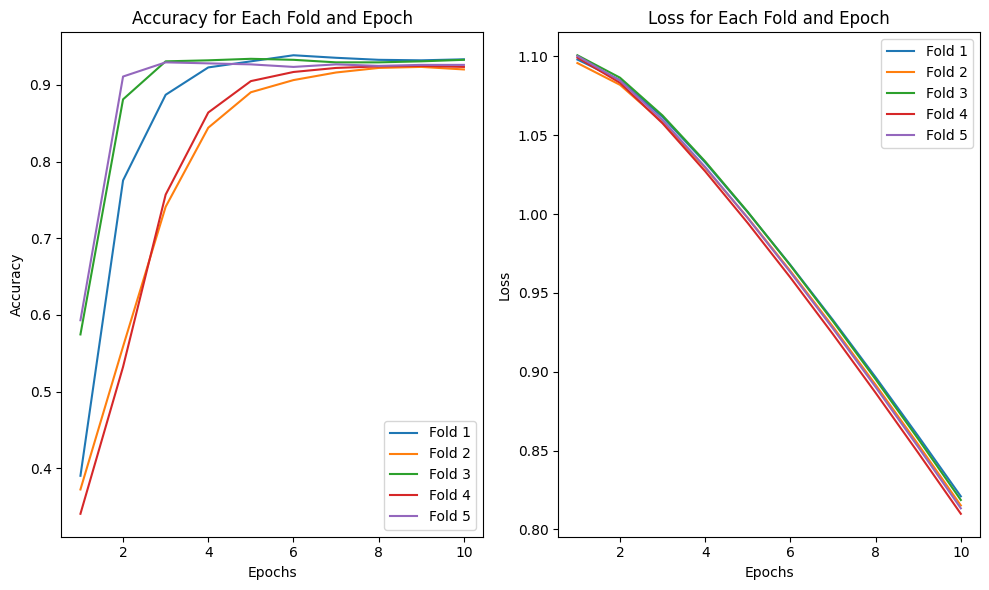

In [24]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with normalized text and labels (replace with your actual data)

df = pd.DataFrame(data)

# Split the data into training and testing sets
X = df['normalized_text']
y = df['Type_Encoded']

# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define the neural network model
class TextClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Lists to store accuracies for each fold and losses for each epoch
accuracies = []
losses = []

# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(skf.split(X_tfidf, y_encoded), 1):
    X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Convert NumPy arrays to PyTorch tensors and ensure the data types are the same
    X_train = torch.tensor(X_train.toarray(), dtype=torch.float32)
    X_test = torch.tensor(X_test.toarray(), dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.int64)
    y_test = torch.tensor(y_test, dtype=torch.int64)

    # Instantiate and train the model
    INPUT_DIM = X_train.shape[1]
    HIDDEN_DIM = 256
    OUTPUT_DIM = len(label_encoder.classes_)

    model = TextClassifier(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM)
    optimizer = optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()

    N_EPOCHS = 10
    accuracies_fold = []
    losses_fold = []

    for epoch in range(N_EPOCHS):
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = criterion(predictions, y_train)
        loss.backward()
        optimizer.step()
        losses_fold.append(loss.item())

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            predictions = model(X_test)
            predicted_labels = torch.argmax(predictions, dim=1)
            accuracy = accuracy_score(y_test, predicted_labels)
            accuracies_fold.append(accuracy)

    accuracies.append(accuracies_fold)
    losses.append(losses_fold)

    # Release GPU memory
    del X_train, X_test, y_train, y_test, model
    torch.cuda.empty_cache()

# Calculate the average accuracy over all folds
avg_accuracy = np.mean(accuracies, axis=0)
print(f'Average Accuracy for Each Epoch: {avg_accuracy}')

# Create graphs to visualize accuracy for each fold and loss for each epoch
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(1, 2, 1)
for fold in range(k_folds):
    plt.plot(range(1, N_EPOCHS + 1), accuracies[fold], label=f'Fold {fold + 1}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Fold and Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
for fold in range(k_folds):
    plt.plot(range(1, N_EPOCHS + 1), losses[fold], label=f'Fold {fold + 1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for Each Fold and Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Optimizing Model Performance: Discovering the Best Parameters through Stratified K-Fold Cross-Validation and Grid Search

Stratified K-Fold Cross-Validation coupled with Grid Search plays a pivotal role in choosing optimal hyperparameters by systematically testing various configurations, ensuring the model's robustness and suitability for the task.

In [15]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, ParameterGrid
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Sample DataFrame with normalized text and labels (replace with your actual data)
df = pd.DataFrame(data)

# Split the data into training and testing sets
X = df['normalized_text']
y = df['Type_Encoded']

# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define the neural network model and move it to GPU
class TextClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = TextClassifier(X_tfidf.shape[1], 256, len(label_encoder.classes_))
model.to(device)

# Define the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)
X_tfidf = X_tfidf.toarray()

# Define hyperparameters and their ranges
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'hidden_dim': [128, 256, 512],
    'batch_size': [32, 64, 128],
    'N_EPOCHS': [5, 10, 15]
}

# Initialize cross-validation
k_folds = 3
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store the best hyperparameters and their corresponding accuracy
best_hyperparameters = None
best_accuracy = 0

# Perform grid search
for params in tqdm(ParameterGrid(param_grid), desc="Grid Search"):
    learning_rate = params['learning_rate']
    hidden_dim = params['hidden_dim']
    batch_size = params['batch_size']
    N_EPOCHS = params['N_EPOCHS']

    accuracies = []

    for train_idx, test_idx in skf.split(X_tfidf, y_encoded):
        X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
        X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
        y_train = torch.tensor(y_train, dtype=torch.int64).to(device)
        y_test = torch.tensor(y_test, dtype=torch.int64).to(device)

        model = TextClassifier(X_train.shape[1], hidden_dim, len(label_encoder.classes_))
        model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        criterion = nn.CrossEntropyLoss()

        for epoch in range(N_EPOCHS):
            optimizer.zero_grad()
            predictions = model(X_train)
            loss = criterion(predictions, y_train)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            predictions = model(X_test)
            predicted_labels = torch.argmax(predictions, dim=1)
            accuracy = accuracy_score(y_test.cpu(), predicted_labels.cpu())
            accuracies.append(accuracy)

    avg_accuracy = sum(accuracies) / len(accuracies)

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_hyperparameters = params

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:")
print(best_hyperparameters)
print(f"Best Accuracy: {best_accuracy:.2f}")

Grid Search: 100%|██████████| 81/81 [36:23<00:00, 26.96s/it]

Best Hyperparameters:
{'N_EPOCHS': 15, 'batch_size': 64, 'hidden_dim': 512, 'learning_rate': 0.01}
Best Accuracy: 0.98


## Best Hyperparameters:
{'N_EPOCHS': 15, 'batch_size': 64, 'hidden_dim': 512, 'learning_rate': 0.01}
Best Accuracy: 0.98

# BERT MODEL 
* Superior Performance: BERT consistently achieves top-tier results across various NLP tasks, ensuring high accuracy.

* Transfer Learning: BERT's pre-training on extensive text data allows it to capture complex language patterns, making it advantageous for fine-tuning with limited task-specific data.

* Contextual Comprehension: BERT's bidirectional architecture excels at understanding word context, enabling nuanced meaning and relationship recognition.

* Versatility: BERT's applicability extends to a wide range of NLP tasks, including sentiment analysis and question answering.

* Open-Source Accessibility: Multiple open-source implementations, like Hugging Face Transformers, facilitate easy integration into NLP projects, enhancing its user-friendliness.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch: 100%|██████████| 3/3 [03:39<00:00, 73.17s/it]


Average Accuracy for Each Epoch: [0.96459709 0.97014531 0.96895641]


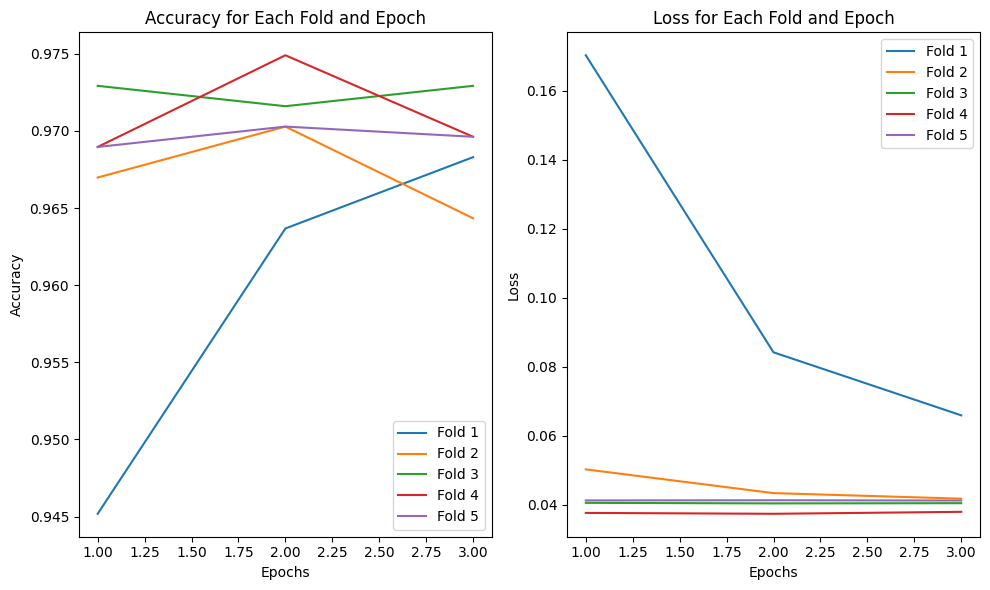

In [17]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import trange

# Sample DataFrame with text and labels (replace with your actual data)
df = pd.DataFrame(data)

# Split the data into training and testing sets
X = df['normalized_text']
y = df['Type_Encoded']

# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # You can choose a different pre-trained model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_))

# Lists to store accuracies for each fold and losses for each epoch
accuracies = []
losses = []

# Hyperparameters
batch_size = 32
learning_rate = 2e-5
num_epochs = 3

# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_encoded), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Tokenize the text data
    X_train_tokens = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='pt', max_length=128)
    X_test_tokens = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='pt', max_length=128)

    # Create DataLoader for training and testing
    train_data = TensorDataset(X_train_tokens.input_ids, X_train_tokens.attention_mask, torch.tensor(y_train))
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

    test_data = TensorDataset(X_test_tokens.input_ids, X_test_tokens.attention_mask, torch.tensor(y_test))
    test_sampler = SequentialSampler(test_data)
    test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    model.to('cuda')

    # Training loop
    accuracies_fold = []
    losses_fold = []

    for _ in trange(num_epochs, desc="Epoch"):
        model.train()
        total_loss = 0

        for batch in train_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to('cuda')
            attention_mask = attention_mask.to('cuda')
            labels = labels.to('cuda')

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        # Evaluate the model
        model.eval()
        total_test_accuracy = 0
        total_test_loss = 0
        total_test_steps = 0

        for batch in test_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to('cuda')
            attention_mask = attention_mask.to('cuda')
            labels = labels.to('cuda')

            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                total_test_accuracy += torch.sum(outputs.logits.argmax(1) == labels).item()
                total_test_loss += outputs.loss.item()
                total_test_steps += 1

        accuracies_fold.append(total_test_accuracy / len(y_test))
        losses_fold.append(total_test_loss / total_test_steps)

    accuracies.append(accuracies_fold)
    losses.append(losses_fold)

# Calculate the average accuracy over all folds
avg_accuracy = np.mean(accuracies, axis=0)
print(f'Average Accuracy for Each Epoch: {avg_accuracy}')

# Create graphs to visualize accuracy for each fold and loss for each epoch
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(1, 2, 1)
for fold in range(k_folds):
    plt.plot(range(1, num_epochs + 1), accuracies[fold], label=f'Fold {fold + 1}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Fold and Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
for fold in range(k_folds):
    plt.plot(range(1, num_epochs + 1), losses[fold], label=f'Fold {fold + 1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for Each Fold and Epoch')
plt.legend()

plt.tight_layout()
plt.show()